In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Training/banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [21]:
x = df.drop('Class', axis =1)
y = df['Class']

In [13]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [23]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

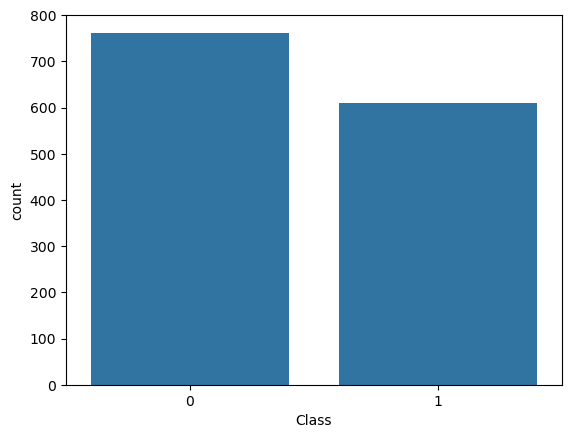

In [27]:
sns.countplot(x=y);

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 random_state = 0
    
)

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

#### Evaluate

In [48]:
y_pred = clf.predict(x_test)

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report, accuracy_score

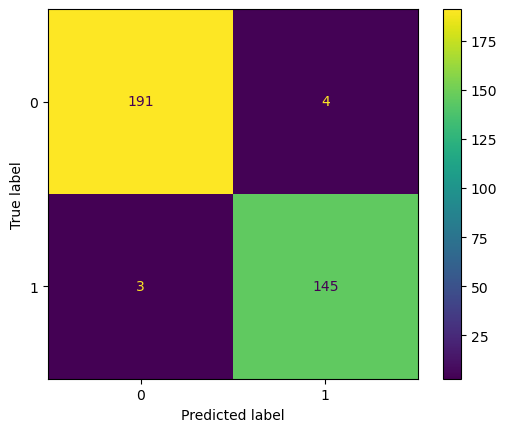

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [60]:
accuracy_score(y_test,y_pred)

0.9795918367346939

In [64]:
from sklearn.tree import plot_tree


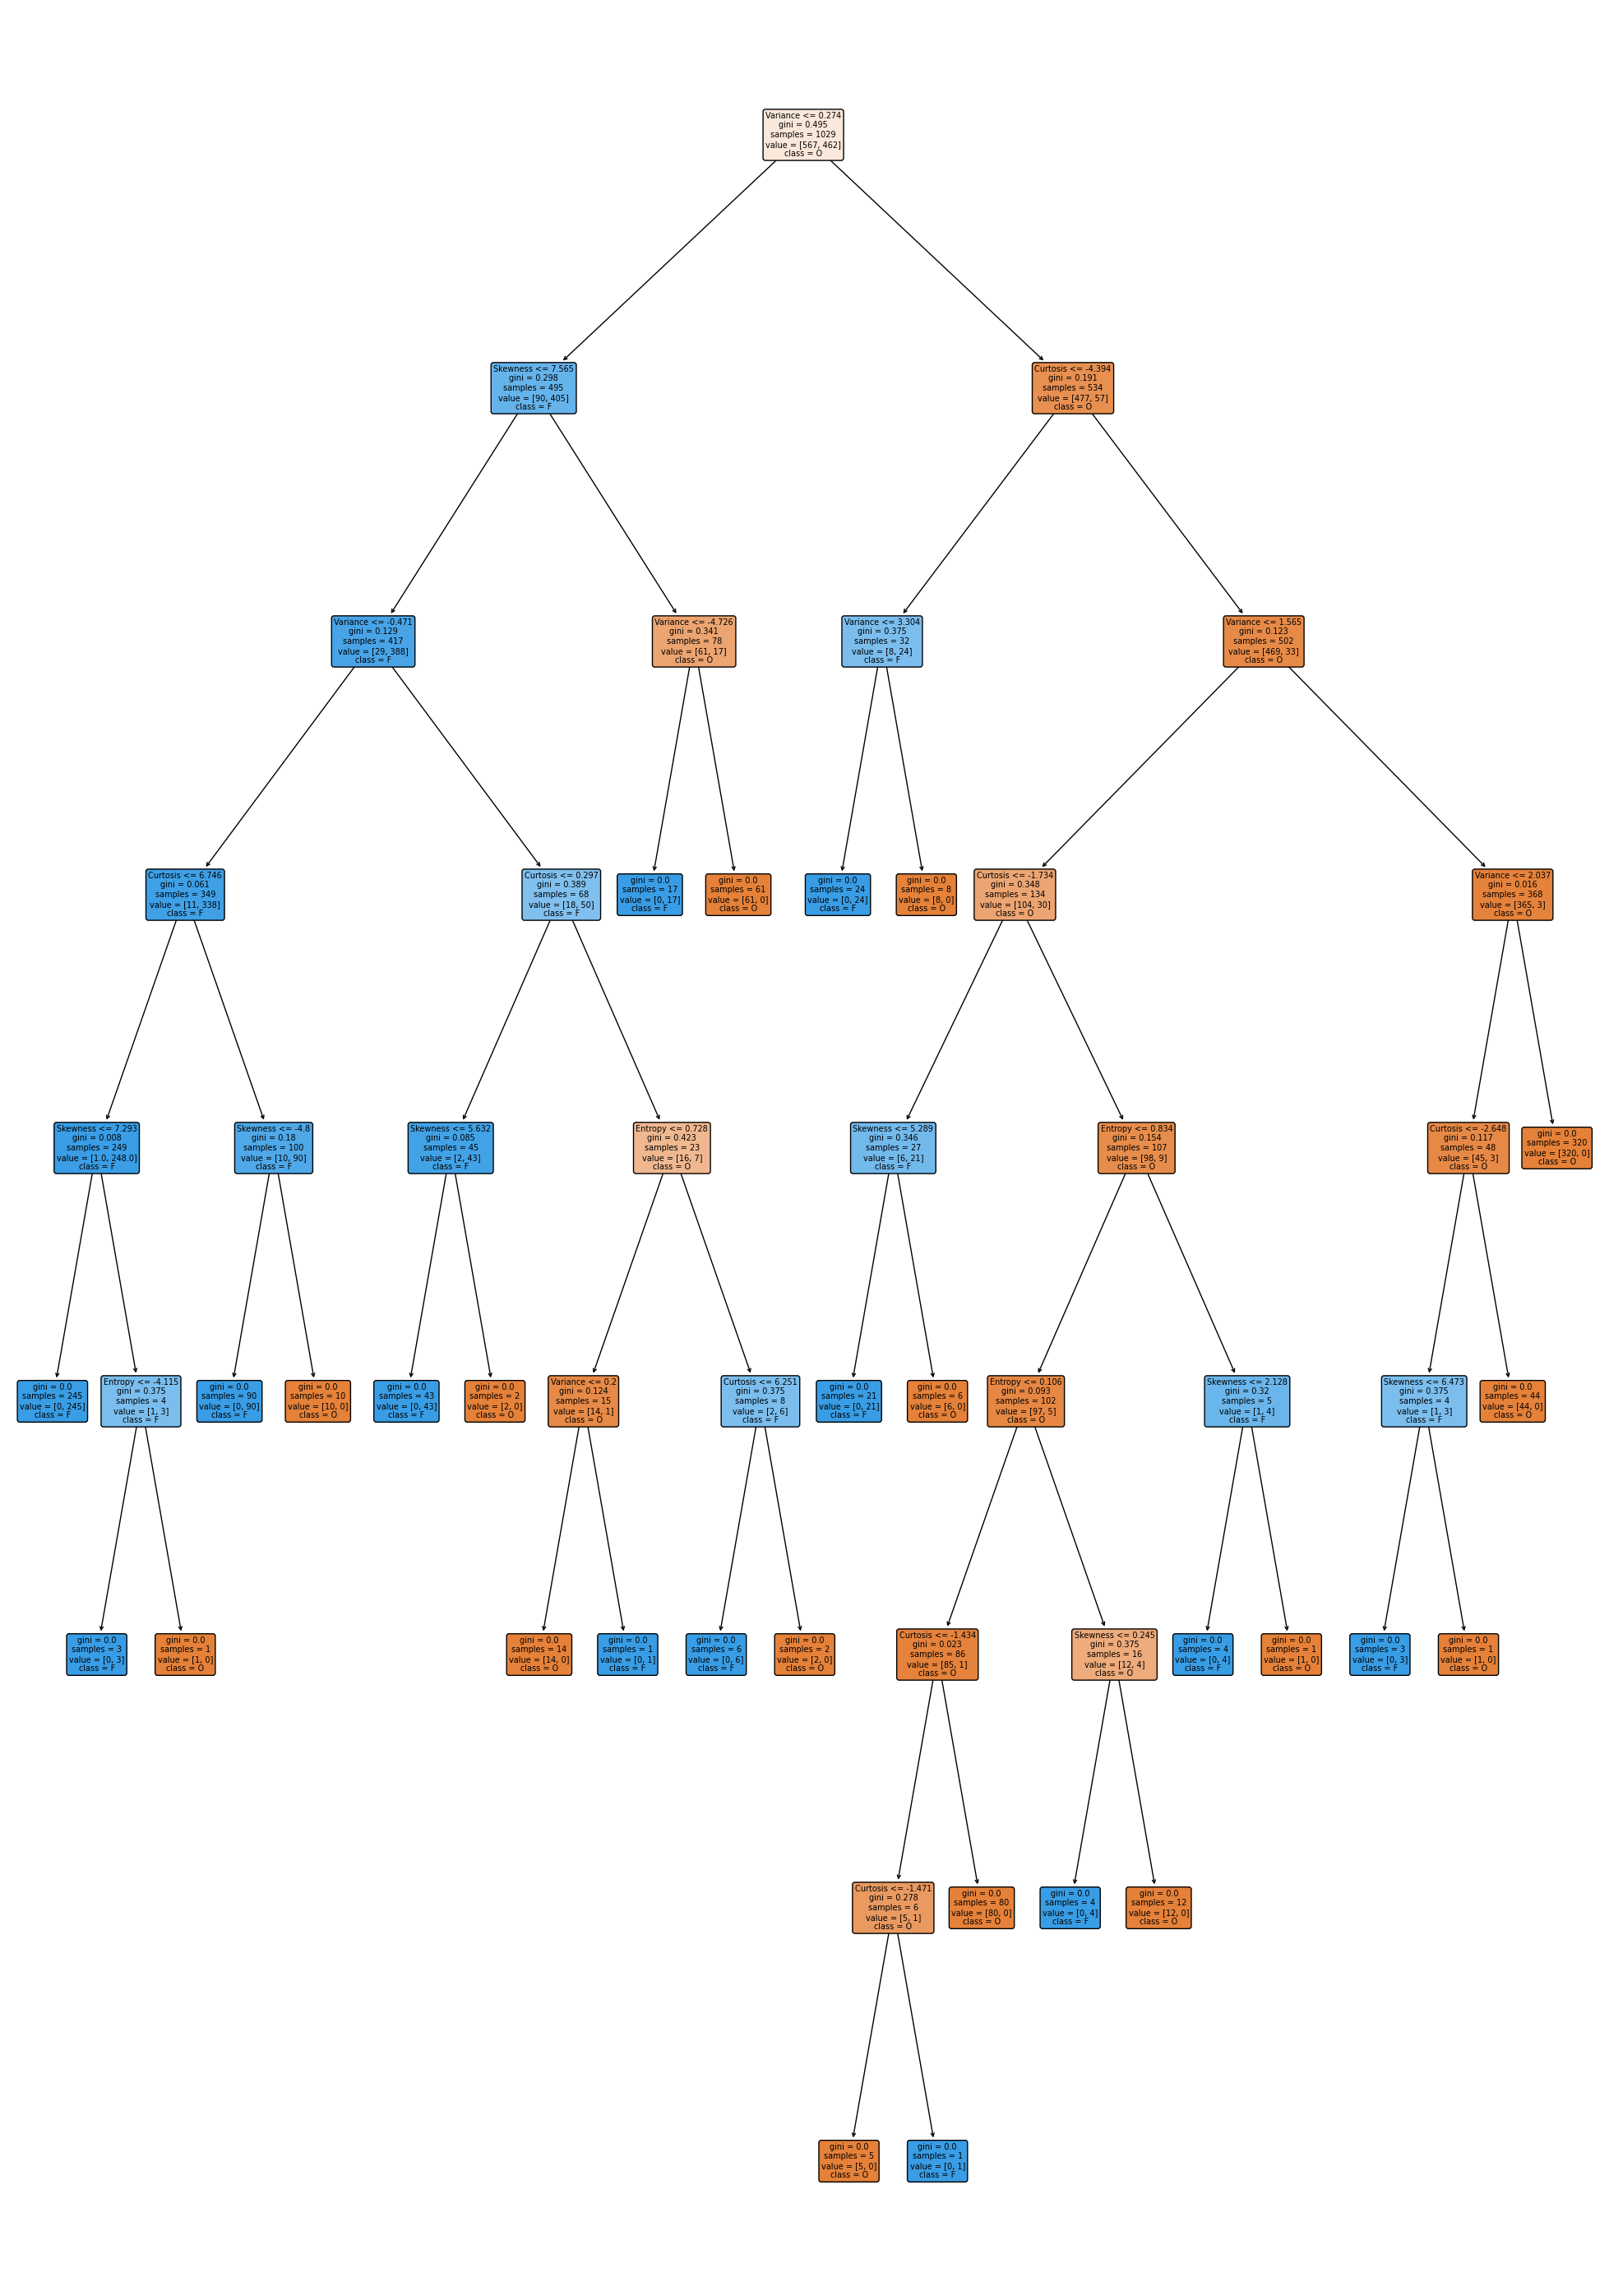

In [72]:
plt.figure(figsize =(25,36))
plot_tree(clf,rounded = True,class_names = ['O','F'],
         feature_names =df.columns, fontsize = 7,filled = True);
plt.savefig('tree.png')

In [88]:
clf.feature_importances_

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

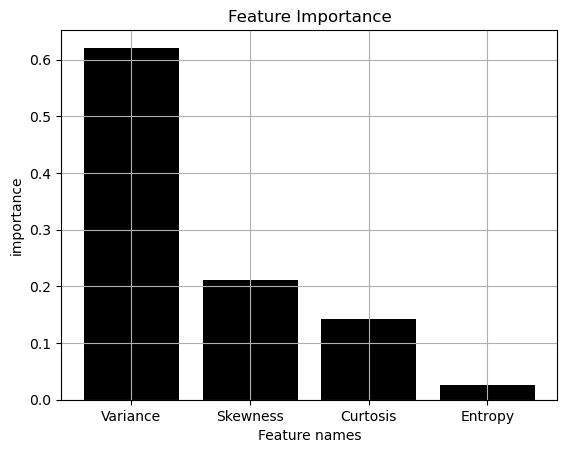

In [96]:
plt.title('Feature Importance')
plt.xlabel('Feature names')
plt.ylabel('importance')

plt.bar(list(x.columns),clf.feature_importances_,color = 'black')
plt.grid()

In [98]:
new = [[ 132.14160, 5.6661, -1.5073, -1.44699]]

In [100]:
clf.predict(new)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)